In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X_train = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\ER rage dataset\Processed data\X_train.csv")
X_test  = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\ER rage dataset\Processed data\X_test.csv")
y_train = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\ER rage dataset\Processed data\y_train.csv")
y_test  = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\ER rage dataset\Processed data\y_test.csv")


In [4]:
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
#Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [8]:
y_pred = baseline_model.predict(X_test_scaled)


In [11]:
#Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)


In [12]:
#Lasso Regression model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)


In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import spearmanr

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))
    print("R²  :", r2_score(y_true, y_pred))
    corr, _ = spearmanr(y_true, y_pred)
    print("Spearman Rank Correlation (Order):", corr)


In [14]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")



Linear Regression
MAE : 0.762894470325016
MSE : 0.9335841125314
RMSE: 0.9662215649277344
R²  : 0.2208656436452302
R²  : 0.2208656436452302
Spearman Rank Correlation (Order): 0.41176174082045225

Ridge Regression
MAE : 0.7628014333050473
MSE : 0.9330582053194584
RMSE: 0.9659493803090607
R²  : 0.22130454611966
R²  : 0.22130454611966
Spearman Rank Correlation (Order): 0.41230182413111005

Lasso Regression
MAE : 0.7656697781482441
MSE : 0.9269153448320779
RMSE: 0.9627644285244848
R²  : 0.226431147555748
R²  : 0.226431147555748
Spearman Rank Correlation (Order): 0.4256186368414113


In [15]:
import pandas as pd

# Example: assume you already have predictions
metrics = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    ],
    'R²': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ],
    'Spearman Corr': [
        spearmanr(y_test, y_pred_lr)[0],
        spearmanr(y_test, y_pred_ridge)[0],
        spearmanr(y_test, y_pred_lasso)[0]
    ]
}

metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,MAE,RMSE,R²,Spearman Corr
0,Linear Regression,0.762894,0.966222,0.220866,0.411762
1,Ridge Regression,0.762801,0.965949,0.221305,0.412302
2,Lasso Regression,0.765670,0.962764,0.226431,0.425619


In [16]:
# Highlight the row with the max Spearman Corr
def highlight_best(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

metrics_df.style.apply(highlight_best, subset=['Spearman Corr'])


,Model,MAE,RMSE,R²,Spearman Corr
0,Linear Regression,0.762894,0.966222,0.220866,0.411762
1,Ridge Regression,0.762801,0.965949,0.221305,0.412302
2,Lasso Regression,0.765670,0.962764,0.226431,0.425619


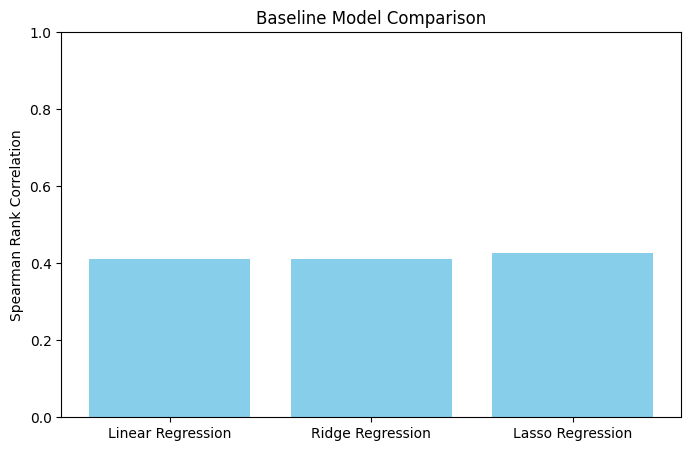

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(metrics_df['Model'], metrics_df['Spearman Corr'], color='skyblue')
plt.ylabel("Spearman Rank Correlation")
plt.title("Baseline Model Comparison")
plt.ylim(0,1)
plt.show()


In [18]:
best_model = metrics_df.loc[metrics_df['Spearman Corr'].idxmax(), 'Model']
print(f"✅ Best baseline model: {best_model}")

✅ Best baseline model: Lasso Regression


In [24]:
import joblib
import os
folder_path = "C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\models"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
# Suppose your best model is lasso_model
file_name = "best_lasso_model.pkl"

# Full path
file_path = os.path.join(folder_path, file_name)

# Save model
joblib.dump(lasso, file_path)



print(f"Model saved successfully at: {file_path}")


Model saved successfully at: C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\models\best_lasso_model.pkl


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\venus\AppData\Local\Temp\ipykernel_18980\4028636359.py:3: SyntaxWarning: invalid escape sequence '\D'
  folder_path = "C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\models"


In [25]:
import joblib
import os
folder_path = "C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\models"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
# Suppose your best model is lasso_model
file_name = "ridge_model.pkl"

# Full path
file_path = os.path.join(folder_path, file_name)

# Save model
joblib.dump(ridge, file_path)



print(f"Model saved successfully at: {file_path}")


Model saved successfully at: C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\models\ridge_model.pkl


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\venus\AppData\Local\Temp\ipykernel_18980\620569278.py:3: SyntaxWarning: invalid escape sequence '\D'
  folder_path = "C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\models"


In [26]:
import joblib
import os
folder_path = "C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\models"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
# Suppose your best model is lasso_model
file_name = "linear_model.pkl"

# Full path
file_path = os.path.join(folder_path, file_name)

# Save model
joblib.dump(lr, file_path)



print(f"Model saved successfully at: {file_path}")


Model saved successfully at: C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\models\linear_model.pkl


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\venus\AppData\Local\Temp\ipykernel_18980\3941468777.py:3: SyntaxWarning: invalid escape sequence '\D'
  folder_path = "C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\models"
